---
# Análise Brazil Covid 19
---

### Importando Bibliotecas Utilizadas

In [207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Leitura dos dados

In [208]:
data = pd.read_csv("brazil_covid19.csv")

### Realçamento dos dados

In [209]:
display(data)

,date,hour,state,suspects,refuses,cases,deaths
0,2020-01-30,16:00,Minas Gerais,1,0,0,0
1,2020-01-30,16:00,Rio de Janeiro,1,0,0,0
2,2020-01-30,16:00,Santa Catarina,0,2,0,0
3,2020-01-30,16:00,São Paulo,3,1,0,0
4,2020-01-30,16:00,Rio Grande do Sul,2,2,0,0
...,...,...,...,...,...,...,...
1003,2020-03-30,NaN,Roraima,0,0,16,0
1004,2020-03-30,NaN,Santa Catarina,0,0,197,1
1005,2020-03-30,NaN,São Paulo,0,0,1517,113
1006,2020-03-30,NaN,Sergipe,0,0,16,0


In [210]:
data['mes'] = data['date'].apply(lambda data_atual:get_mes(data_atual))


In [211]:
data['mes'] = data['mes'].astype(int)

### Selecionando nosso X e Y para análise

In [212]:
x,y = data['deaths'],data['mes']

#### Média de Y e X

In [213]:
y.mean(),x.mean()

(2.7113095238095237, 0.7757936507936508)

#### Variância de Y e X

In [214]:
y.var(),x.var()

(0.2333575684494189, 43.498837502561464)

#### Desvio padrão de Y e X

In [215]:
y.std(),x.std()

(0.48307097661670684, 6.59536484984428)

#### Mediana de Y e X

In [216]:
y.median(),x.median()

(3.0, 0.0)

#### Histogramas de X e Y, respectivamente

Text(0.5, 1.0, 'Histograma de Mortes')

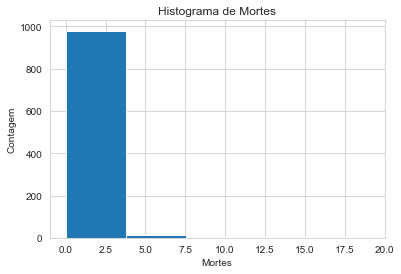

In [217]:
plt.hist(x,bins = 30)
plt.xlim((-1,20))
plt.xlabel('Mortes')
plt.ylabel('Contagem')
plt.title('Histograma de Mortes')

Text(0.5, 1.0, 'Histograma dos Meses')

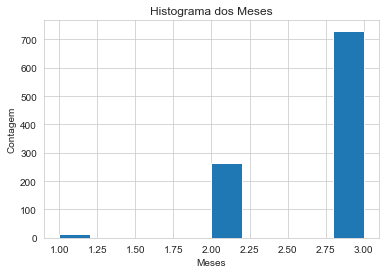

In [218]:
plt.hist(y)
plt.xlabel('Meses')
plt.ylabel('Contagem')
plt.title('Histograma dos Meses')

#### Coeficiente de corelação entre X e Y

In [219]:
np.corrcoef(x,y)

array([[1.        , 0.07036553],
       [0.07036553, 1.        ]])

## Regressão Linear

In [220]:
from scipy.stats import linregress

In [221]:
slope,intercept, r_value,p_value,std_err = linregress(x,y)

In [222]:
y_pred = x*slope + intercept

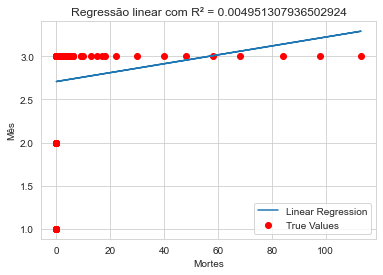

In [223]:
plt.scatter(x,y,color='r',label='True Values')
plt.plot(x,y_pred,label='Linear Regression')
plt.xlabel('Mortes')
plt.ylabel('Mês')
plt.title('Regressão linear com R² = {}'.format(r_value**2))
plt.legend()